# K-Means Clustering For Image Compression

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from utils import * 

%matplotlib inline

## Find closest centroids

In [2]:
def find_closest_centroids(X, centroids):
    
    # X (ndarray) : (m, n) input values
    # centroids (ndarray): (k, n) centroids

    K = centroids.shape[0]
    
    idx = np.zeros(X.shape[0], dtype=int)
    
    for i in range(X.shape[0]):
        distance=[]
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i]-centroids[j])
            distance.append(norm_ij)
        
        idx[i]=np.argmin(distance)
    return idx

### Computing centroid means Given assignments of every point to a centroid, the second phase of the algorithm recomputes,  for each centroid, the mean of the points that were assigned to it.

In [3]:
def compute_centroids(X, idx, K):
    
    """ X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids  """
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    for i in range(K):
        points = X[idx==i]
        centroids[i] = np.mean(points,axis=0)
    
    return centroids

## Running K-means

In [4]:
def run_kmeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    
    for i in range(max_iters):
        
        idx = find_closest_centroids(X, centroids)
        
        centroids = compute_centroids(X,idx,K)
        
    return centroids, idx

# Random initialization of clusters

In [5]:
def kmeans_init_centroids(X, K):
    """ X (ndarray): Data points 
        K (int):     number of centroids/clusters """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
     #Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [6]:
# Load Image

In [29]:
original_img = plt.imread('istockphoto-697378816-612x612.jpg')

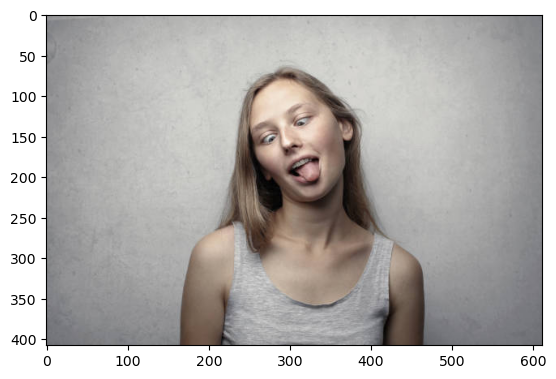

In [30]:
# visualizing the image


plt.imshow(original_img)

In [31]:
original_img.shape

(408, 612, 3)

In [32]:
# this division is applicable only for jpg images
original_img = original_img/255

In [33]:
# reshaping image

X_img = np.reshape(original_img, (original_img.shape[0]*original_img.shape[1],3))

# K -Means on image pixels

In [40]:
K = 15
max_iters = 10

initial_centroids = kmeans_init_centroids(X_img, K)

centroids, idx = run_kmeans(X_img, initial_centroids, max_iters)

In [41]:
centroids.shape

(15, 3)

### Find the closest centroid of each pixel

In [42]:
idx1 = find_closest_centroids(X_img, centroids)

In [43]:
# Replace each pixel with the color of the closest centroid
 
X_recovered = centroids[idx1, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

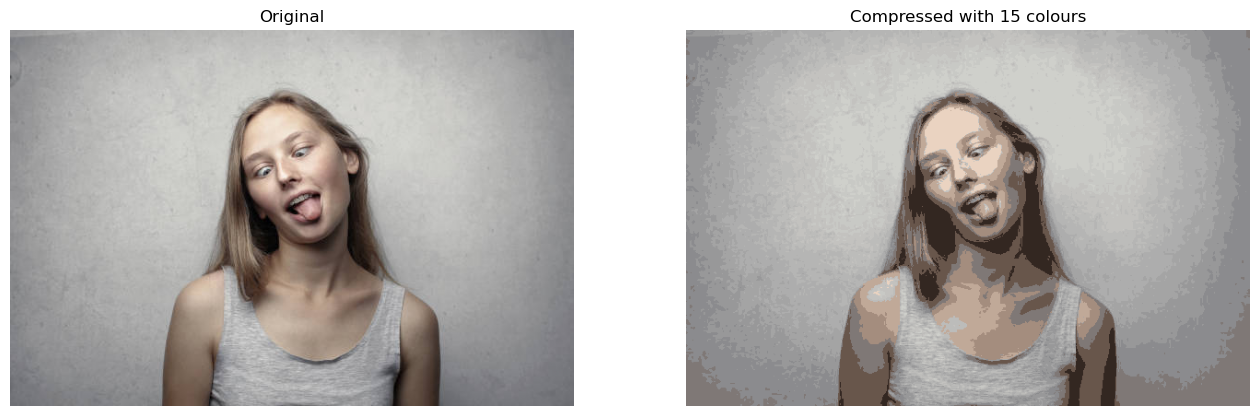

In [44]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

#                                     Compressed image with 15 colours